# Robustness evaluation of unsupervised deep learning model

In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from datamanager.dataset import KDD10Dataset, NSLKDDDataset, IDS2018Dataset
import matplotlib.ticker as ticker
import torch
from torch.utils.data import Dataset, Subset, DataLoader
from model.reconstruction import AutoEncoder as AE
from trainer.reconstruction import AutoEncoderTrainer
import os
from utils.metrics import compute_metrics, _estimate_optimal_threshold

%load_ext autoreload
%autoreload 2

### KDD 10

In [2]:
kdd_dataset_path = "../data/processed/kdd/3_minified/KDD10percent_minified.npz"
kdd_dataset = KDD10Dataset(path=kdd_dataset_path, pct=1.0)
train_set_kdd, test_set_kdd, _ = kdd_dataset.split_train_test(test_pct= .3,
                         label= 0,
                         holdout=0.4,
                         contamination_rate=0.15,
                         validation_ratio= 0.0,
                         debug=True)

Dataset size
Positive class :97278
Negative class :396743

Training set
Contamination rate: 0.14999964292600712

494021 317415


In [455]:
len(train_set_kdd)

140027

In [454]:
y_kdd =  train_set_kdd[:][1]
normal_idx_kdd = np.where(y_kdd == 1)
abnormal_idx_kdd = np.where(y_kdd == 0)

In [456]:

X_embedded_kdd = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_set_kdd[:][0])

In [458]:
from copy import deepcopy
X_embedded_kdd = deepcopy(X_embedded)

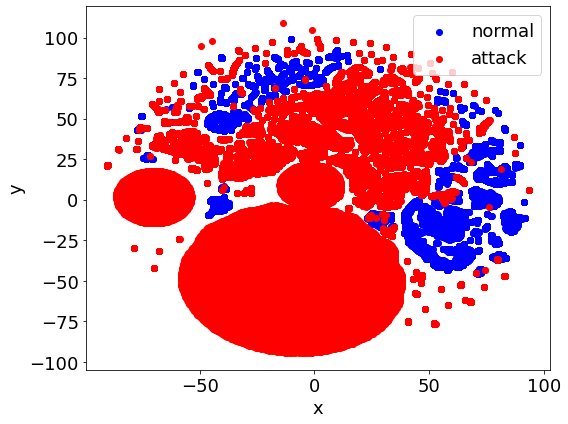

In [507]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_embedded_kdd[normal_idx_kdd,0], X_embedded_kdd[normal_idx_kdd,1], c='blue', label='normal')
plt.scatter(X_embedded_kdd[abnormal_idx_kdd,0], X_embedded_kdd[abnormal_idx_kdd,1], c='red', label='attack')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
fig.savefig('kddtsne_25.png')
plt.show()


In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_set[:][0])

### NSL-KDD

In [474]:
dataset_path_nsl = "../data/processed/nslkdd/3_minified/NSL-KDD_minified.npz"
dataset_nsl = NSLKDDDataset(path=dataset_path_nsl, pct=1.0)
train_set_nsl, test_set_nsl, _ = dataset_nsl.split_train_test(test_pct= .5,
                         label= 0,
                         holdout=0.2,
                         contamination_rate=0.25,
                         validation_ratio= 0.0,
                         debug=True)

Dataset size
Positive class :71463
Negative class :77054

Training set
Contamination rate: 0.24999513325157197

148517 147066


In [475]:
y_nsl =  train_set_nsl[:][1]
normal_idx_nsl = np.where(y_nsl == 0)
abnormal_idx_nsl = np.where(y_nsl == 1)

In [476]:
X_embedded_nsl = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_set_nsl[:][0])

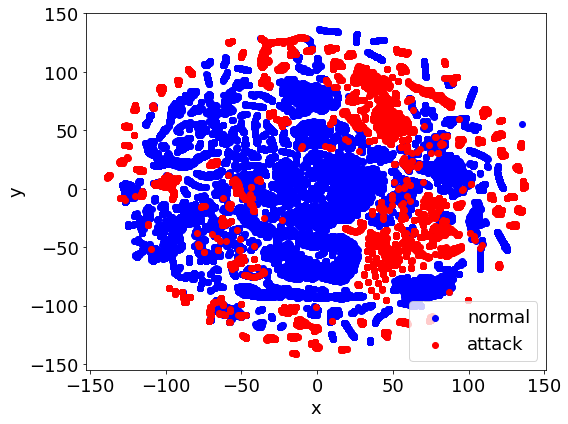

In [506]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_embedded_nsl[normal_idx_nsl,0], X_embedded_nsl[normal_idx_nsl,1], c='blue', label='normal')
plt.scatter(X_embedded_nsl[abnormal_idx_nsl,0], X_embedded_nsl[abnormal_idx_nsl,1], c='red', label='attack')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
fig.savefig('nsltsne_25.png')
plt.show()

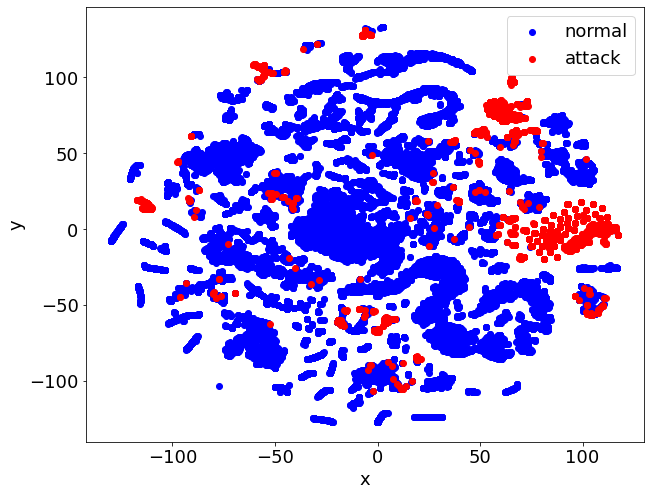

In [62]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(train_set[:][0])
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[normal_idx,0], X_embedded[normal_idx,1], c='blue', label='normal')
plt.scatter(X_embedded[abnormal_idx,0], X_embedded[abnormal_idx,1], c='red', label='attack')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
fig.savefig('nsltsne_25_.pdf')
plt.show()

### CIC IDS 2018

In [481]:
# dataset_path_cic_inf = "../data/processed/cic/new/feature_group_5.npz"
# dataset_cic_inf = IDS2018Dataset(path=dataset_path_cic_inf, pct=.05)
# train_set_cic_inf, test_set_cic_inf, _ = dataset_cic_inf.split_train_test(test_pct= .2,
#                          label= 0,
#                          holdout=0.4,
#                          contamination_rate=0.25,
#                          validation_ratio= 0.0,
#                          debug=True)

In [64]:
y =  train_set[:][1]
normal_idx = np.where(y == 0)
abnormal_idx = np.where(y == 1)

In [65]:
len(np.unique(train_set[:][0]))/len(train_set[:][0])

9.012918591638211

In [66]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_set[:][0])

C:\Users\nkad2101\AppData\Local\Temp\ipykernel_7256\1430074103.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig('cicids_25.pdf')
C:\Users\nkad2101\Miniconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


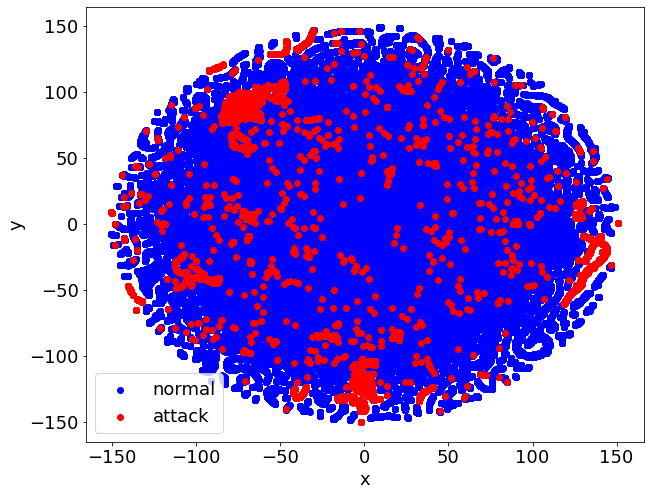

In [68]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[normal_idx,0], X_embedded[normal_idx,1], c='blue', label='normal')
plt.scatter(X_embedded[abnormal_idx,0], X_embedded[abnormal_idx,1], c='red', label='attack')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
fig.savefig('cicids_25.pdf')
plt.show()

In [447]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[normal_idx,0], X_embedded[normal_idx,1], c='blue', label='normal')
plt.scatter(X_embedded[abnormal_idx,0], X_embedded[abnormal_idx,1], c='red', label='Infiltration')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
fig.savefig('cict01032018_25_.pdf')
plt.show()

IndexError: index 31782 is out of bounds for axis 0 with size 31782

<Figure size 720x576 with 0 Axes>

### Ablation on CICIDS

In [501]:
dataset_path_cic_inf = "../data/processed/cic/new/feature_group_5__.npz"
dataset_cic_inf = IDS2018Dataset(path=dataset_path_cic_inf, pct=.5)
train_set_cic_inf, test_set_cic_inf, _ = dataset_cic_inf.split_train_test(test_pct= .4,
                         label= 0,
                         holdout=0.4,
                         contamination_rate=0.05,
                         validation_ratio= 0.0,
                         debug=True)

Dataset size
Positive class :46201
Negative class :117889

Training set
Contamination rate: 0.049982875677418055

164090 124512


In [502]:
y_cic_inf =  train_set_cic_inf[:][1]
normal_idx_cic_inf = np.where(y_cic_inf == 0)
abnormal_idx_cic_inf = np.where(y_cic_inf == 1)

In [503]:
X_embedded_cic_inf = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_set_cic_inf[:][0])


In [488]:
labels_cic_inf = train_set_cic_inf[:][3].reshape(-1)

In [489]:
np.unique(labels_cic_inf[np.where(labels_cic_inf!="Benign")])

array(['Infilteration'], dtype=object)

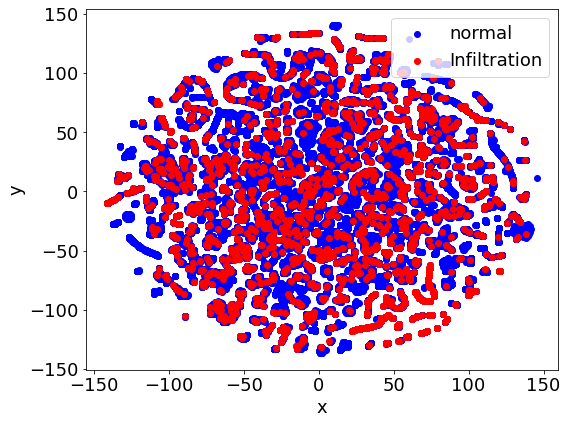

In [505]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_embedded_cic_inf[normal_idx_cic_inf,0], X_embedded_cic_inf[normal_idx_cic_inf,1], c='blue', label='normal')
plt.scatter(X_embedded_cic_inf[abnormal_idx_cic_inf,0], X_embedded_cic_inf[abnormal_idx_cic_inf,1], c='red', label='Infiltration')
plt.title("")
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
fig.savefig('cict01032018_25_inf.png')
plt.show()

### Ablation on CICIDS

In [255]:
dataset_path = "../data/processed/cicnew/3_minified/feature_group_5.npz"
dataset = IDS2018Dataset(path=dataset_path, pct=.25)

In [295]:
CONTAMINATION_RATE = 0.0
train_set, test_set, val_set = dataset.split_train_test(test_pct= .5,
                         label= 0,
                         holdout=0.4,
                         contamination_rate=CONTAMINATION_RATE,
                         validation_ratio= 0.0,
                         debug=True)

Dataset size
Positive class :686733
Negative class :3347558

Training set
Contamination rate: 0.0

4034291 3759597


In [296]:
y =  train_set[:][1]
normal_idx = np.where(y == 0)
abnormal_idx = np.where(y == 1)

In [297]:
abnormal_idx

(array([], dtype=int64),)

In [298]:
np.unique(train_set[:][3])

array(['Benign'], dtype=object)

### Attack distribution

In [299]:
mappin_att = ['Brute Force','DDoS', 'DoS']
def attack_map(x: str):
    newname = [el for el in mappin_att if x.lower().startswith(el.lower())]
    return newname[0] if len(newname)>0 else x

In [268]:
labels = dataset[:][3]

In [269]:
attack_idx = np.where(labels!="Benign")
attack_labels = labels[attack_idx]
attack_labels = np.array(list(map(attack_map, attack_labels)))
labels[attack_idx] = attack_labels

In [300]:
# Attack count in the 
attack, attack_count = np.unique(labels, return_counts=True)
dict(zip(attack, attack_count))

{'Benign': 3347558,
 'Bot': 71373,
 'Brute Force': 229,
 'DDoS': 316196,
 'DoS': 163545,
 'FTP-BruteForce': 48344,
 'Infilteration': 40287,
 'SQL Injection': 24,
 'SSH-Bruteforce': 46735}

In [290]:
# fig = plt.figure()
def plot_hist(attack, attack_count, name='hist'):
    fig, ax = plt.subplots(figsize=(10, 8))
    yax_v = np.arange(len(attack))
    ax.barh(yax_v, attack_count)
    ax.set_yticks(yax_v, labels=attack)
    ax.invert_yaxis()
    # ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.title("")
    plt.ylabel('', fontsize=18)
    plt.xlabel('', fontsize=18)
    plt.tick_params(labelsize=18)
    # plt.legend(fontsize=18)
    fig.savefig(f'{name}.pdf')
    plt.show()

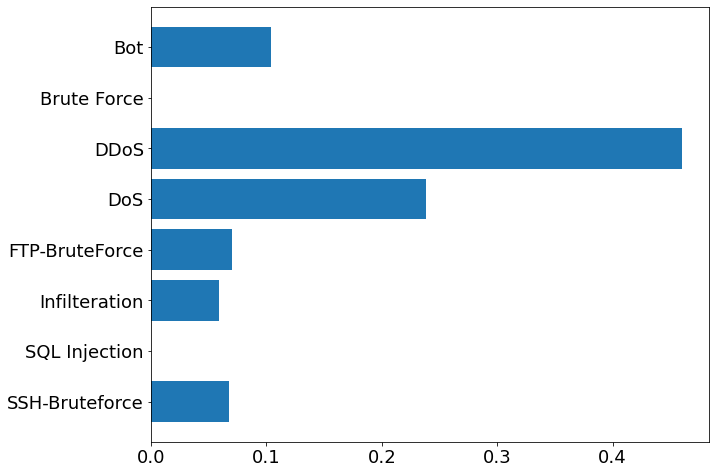

In [292]:
plot_hist(attack, attack_count/np.sum(attack_count), name='cicall')

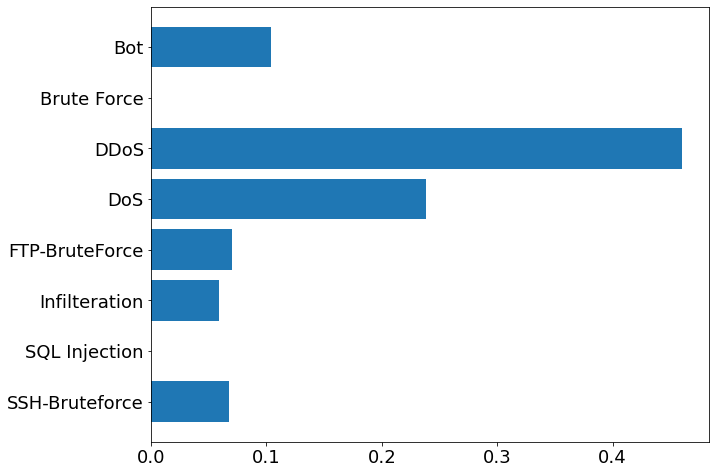

In [273]:
# Attack count in the 
attack, attack_count = np.unique(attack_labels, return_counts=True)
dict(zip(attack, attack_count))

plot_hist(attack, attack_count, name='cicattack')

In [274]:
dict(zip(attack, attack_count/np.sum(attack_count)))

{'Bot': 0.10393122217805173,
 'Brute Force': 0.0003334629324642911,
 'DDoS': 0.4604351327226156,
 'DoS': 0.2381493244099235,
 'FTP-BruteForce': 0.07039708300023444,
 'Infilteration': 0.05866472122353229,
 'SQL Injection': 3.494808025826631e-05,
 'SSH-Bruteforce': 0.06805410545291984}

### Attack distribution in different datasets

### Training set

In [301]:
# Training set

tr_lbl = labels[train_set[:][2]]
tr_lbl = tr_lbl[tr_lbl != "Benign"]

In [302]:
tr_lbl_u, tr_lbl_count_u = np.unique(tr_lbl, return_counts=True)
dict(zip(tr_lbl_u, tr_lbl_count_u))

{}

In [277]:
dict(zip(tr_lbl_u, tr_lbl_count_u/np.sum(tr_lbl_count_u)))

{'Bot': 0.10299342740058802,
 'Brute Force': 0.00027243935386466573,
 'DDoS': 0.4613533424903227,
 'DoS': 0.23816875347643968,
 'FTP-BruteForce': 0.07064125412915896,
 'Infilteration': 0.059119339788632465,
 'SQL Injection': 1.1351639744361073e-05,
 'SSH-Bruteforce': 0.06744009172124914}

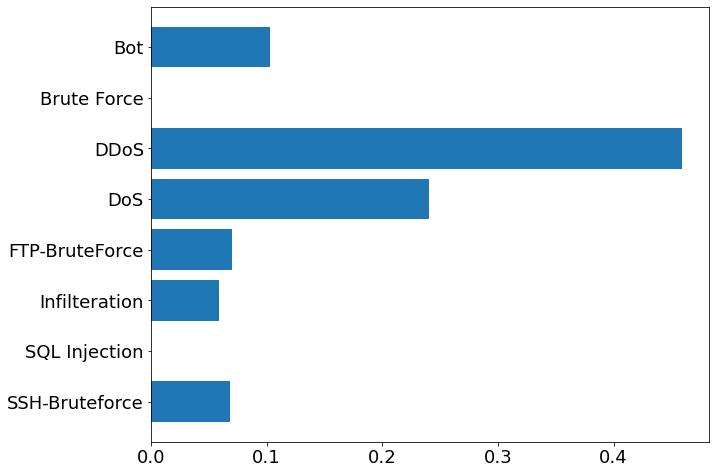

In [278]:
plot_hist(tr_lbl_u, tr_lbl_count_, name='cicattack_tr')

#### Training DAE

In [365]:
def resolve_model(CONTAMINATION_RATE, corruption_label):
    BATCH_SIZE = 4096
    learning_rate = 1e-4
    train_set, test_set, val_set = dataset.split_train_test(test_pct= .5,
                             label= 0,
                             holdout=0.4,
                             contamination_rate=CONTAMINATION_RATE,
                             validation_ratio= 0.0,
                             corruption_label=corruption_label,
                             debug=True)

    
    train_ldr = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, num_workers=0)
    test_ldr  = DataLoader(dataset=test_set, batch_size=BATCH_SIZE, num_workers=0)
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = AE(
                dataset_name=dataset.name,
                in_features=dataset.in_features,
                n_instances=dataset.n_instances,
                device=device,
                ae_latent_dim=2
            )
    trainer = AutoEncoderTrainer(
                model=model,
                lr=learning_rate,
                n_epochs=100,
                batch_size=BATCH_SIZE,
                device=device
            )
    return train_ldr, test_ldr, model, trainer, train_set, test_set
    


In [305]:
trainer.train(train_ldr)

  1%|▌                                                           | 4/409 [00:00<00:13, 30.83it/s, epoch=1, loss=14.829]

Started training


100%|█████████████████████████████████████████████████████████| 409/409 [00:16<00:00, 24.64it/s, epoch=100, loss=2.281]


In [310]:
# os.makedirs('models')
model.save(f'models/dae_{CONTAMINATION_RATE}p.pk')

In [357]:
def test(trainer, dataset: DataLoader):
    trainer.model.eval()
    y_true, scores, idxs, lbls = [], [], [], []
    with torch.no_grad():
        for row in dataset:
            X, y, idx, lbl = row[0], row[1], row[2], row[3]
            X = X.to(device).float()
            score = trainer.score(X)
            y_true.extend(y.cpu().tolist())
            scores.extend(score.cpu().tolist())
            idxs.extend(idx.cpu().tolist())
            lbls.extend(list(lbl))
    trainer.model.train()
    return np.array(scores), np.array(y_true), np.array(idxs), np.array(lbls)

In [388]:

def estimate_threshold(trainer, test_ldr):
    scores, y_true, idxs, lbls = test(trainer, test_ldr)
    loc_perm = np.random.permutation(np.arange(len(scores)))
    n_sample_v = int(.2 * len(scores))

    #  Randomly draw 20percent of data to find the threshold
    scores_test, y_true_test, lbls_test =  np.array(scores[loc_perm[n_sample_v:]]), np.array(y_true[loc_perm[n_sample_v:]]),\
    np.array(labels[idxs[loc_perm[n_sample_v:]]])
    scores_val, y_true_val =  np.array(scores[loc_perm[:n_sample_v]]), np.array(y_true[loc_perm[:n_sample_v]])

    # Estimate the threshold
    res = _estimate_optimal_threshold(scores_val, y_true_val, 1, 100)
    return scores_test, y_true_test, lbls_test, res

In [433]:

def get_metrics(scores_test, y_true_test, lbls_test, res):
    # Compute different metrics
    metrics = compute_metrics(scores_test, y_true_test, res['Thresh_star'], 1)
    f_res = {
            "Precision": metrics[1],
            "Recall": metrics[2],
            "F1-Score": metrics[3],
            "AUPR": metrics[5],
            "AUROC": metrics[4],
            # "Thresh_star": threshold,
            # "Quantile_star": qis
        }
    print(f"final metrics{f_res}")

    # Prediction 
    y_pred_test = trainer.predict(scores_test, res['Thresh_star'])

    # Stat of detection rate
    correct_pred_idx = np.where(y_pred_test == y_true_test)
    correct_pred_lbls = lbls_test[correct_pred_idx]

    # 
    test_lbl_u, test_lbl_count_u = np.unique(lbls_test, return_counts=True)
    test_lbl_u_dict = dict(zip(test_lbl_u, test_lbl_count_u))
    print(f'\nTest set sample per class count:\n{test_lbl_u_dict}')

    #
    corr_lbl_u, corr_lbl_count_u = np.unique(correct_pred_lbls, return_counts=True)
    corr_lbl_u_dict = dict(zip(corr_lbl_u, corr_lbl_count_u))
    print(f'\nCorrect prediction count:\n{corr_lbl_u_dict}')

    #
    pred_stat_by_class = {k : 100 * corr_lbl_u_dict.get(k, 0) / test_lbl_u_dict[k] for k in test_lbl_u }
    print(f'\nDetection ratio per class:\n{pred_stat_by_class}')
    
    return pred_stat_by_class, f_res
    # plot_hist(pred_stat_by_class.keys(), np.array(list(pred_stat_by_class.values())), name=f'cicattack_tr_detection{CONTAMINATION_RATE}')

In [322]:
pred_stat_by_class

{'Benign': 94.6215137954242,
 'Bot': 98.42860462414313,
 'Brute Force': 34.78260869565217,
 'DDoS': 20.43149548220542,
 'DoS': 97.5749148477465,
 'FTP-BruteForce': 100.0,
 'Infilteration': 14.332264404675701,
 'SQL Injection': 0.0,
 'SSH-Bruteforce': 99.99556717939625}

In [320]:
pred_stat_by_class_w_i

{'Benign': 86.62975339294715,
 'Bot': 50.07250159503509,
 'Brute Force': 45.91836734693877,
 'DDoS': 21.101153212520593,
 'DoS': 100.0,
 'FTP-BruteForce': 100.0,
 'Infilteration': 20.417101147028156,
 'SQL Injection': 18.181818181818183,
 'SSH-Bruteforce': 100.0}

In [331]:
att_count = dict(normal=np.array(list(pred_stat_by_class.values())), contaminated=np.array(list(pred_stat_by_class_w_i.values())))
att_count

{'normal': array([ 94.6215138 ,  98.42860462,  34.7826087 ,  20.43149548,
         97.57491485, 100.        ,  14.3322644 ,   0.        ,
         99.99556718]),
 'contaminated': array([ 86.62975339,  50.0725016 ,  45.91836735,  21.10115321,
        100.        , 100.        ,  20.41710115,  18.18181818,
        100.        ])}

In [445]:
def plot_multibar(attack, attack_count, name='hist'):
    fig, ax = plt.subplots(figsize=(12, 6))
    yax_v = np.arange(len(attack))
    width = 0.4
    i = 0
    
    #TODO fix to generalize
    for k in attack_count.keys():
        if i == 0:
            ax.barh(yax_v - width/2, attack_count[k], width,label=k)
        else:
            ax.barh(yax_v + width/2, attack_count[k], width,label=k)
        i +=1
        
        
    ax.set_yticks(yax_v, labels=attack)
    ax.invert_yaxis()
    # ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.title("")
    plt.ylabel('', fontsize=18)
    plt.xlabel('', fontsize=18)
    plt.tick_params(labelsize=18)
    plt.legend(fontsize=18, loc=(1.04, 0))
    fig.tight_layout()
    fig.savefig(f'{name}.pdf')
    plt.show()

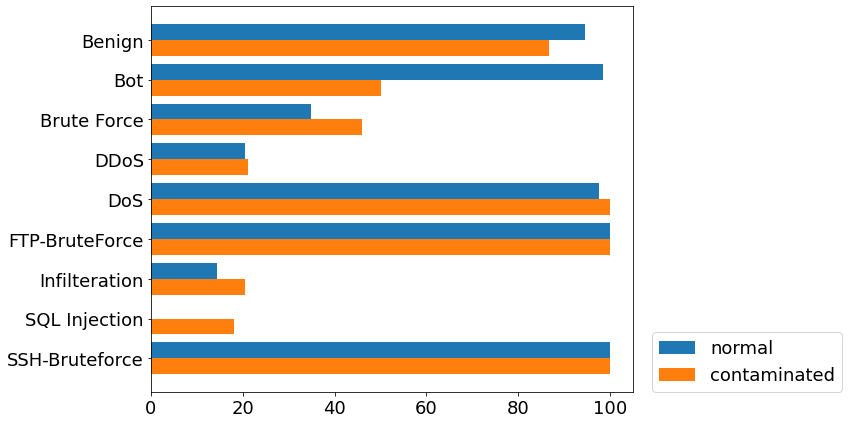

In [446]:
plot_multibar(attack, att_count, name='cicmultibar')

## Training with different type of contamination

#### Corruption with DDOS

In [366]:
train_ldr_0, test_ldr_0, model_0, trainer_0, train_set_0, test_set_0 =  resolve_model(0.05, 'DDOS')

Dataset size
Positive class :686733
Negative class :3347558

Training set
Contamination rate: 0.04999965945312713

4034291 3847690


In [368]:
# np.unique(train_set_0[:][3])

In [370]:
trainer_0.train(train_ldr_0)

  1%|▌                                                           | 4/431 [00:00<00:16, 25.16it/s, epoch=1, loss=17.042]

Started training


100%|█████████████████████████████████████████████████████████| 431/431 [00:14<00:00, 29.95it/s, epoch=100, loss=2.466]


In [389]:
scores_test0, y_true_test0, lbls_test0, res0 = estimate_threshold(trainer_0, test_ldr_0)

Ratio of normal data:80.22571512813936


In [390]:
pred_stat0 = get_metrics(scores_test0, y_true_test0, lbls_test0, res0)
pred_stat0

final metrics{'Precision': 0.6312384847069553, 'Recall': 0.5208558389066236, 'F1-Score': 0.5707592577506071, 'AUPR': 0.4609476271084219, 'AUROC': 0.71347629601974}

Test set sample per class count:
{'Benign': 1339107, 'Bot': 34300, 'Brute Force': 106, 'DDoS': 152056, 'DoS': 78521, 'FTP-BruteForce': 23187, 'Infilteration': 19196, 'SQL Injection': 15, 'SSH-Bruteforce': 22167}

Correct prediction count:
{'Benign': 1238833, 'Bot': 33780, 'Brute Force': 43, 'DDoS': 10973, 'DoS': 78495, 'FTP-BruteForce': 23187, 'Infilteration': 3002, 'SQL Injection': 1, 'SSH-Bruteforce': 22166}

Detection ratio per class:
{'Benign': 92.51187545132689, 'Bot': 98.48396501457727, 'Brute Force': 40.56603773584906, 'DDoS': 7.2164202662177095, 'DoS': 99.96688783892208, 'FTP-BruteForce': 100.0, 'Infilteration': 15.638674723900813, 'SQL Injection': 6.666666666666667, 'SSH-Bruteforce': 99.99548878964227}


{'Benign': 92.51187545132689,
 'Bot': 98.48396501457727,
 'Brute Force': 40.56603773584906,
 'DDoS': 7.2164202662177095,
 'DoS': 99.96688783892208,
 'FTP-BruteForce': 100.0,
 'Infilteration': 15.638674723900813,
 'SQL Injection': 6.666666666666667,
 'SSH-Bruteforce': 99.99548878964227}

#### Corruption with DOS

In [376]:
train_ldr_1, test_ldr_1, model_1, trainer_1, train_set_1, test_set_1 =  resolve_model(0.037, 'DOS')
np.unique(train_set_1[:][3])

Dataset size
Positive class :686733
Negative class :3347558

Training set
Contamination rate: 0.0369998527117154

4034291 3823906


array(['Benign', 'DoS'], dtype=object)

In [377]:
trainer_1.train(train_ldr_1)

  1%|▋                                                           | 5/425 [00:00<00:13, 30.87it/s, epoch=1, loss=19.310]

Started training


100%|█████████████████████████████████████████████████████████| 425/425 [00:14<00:00, 30.34it/s, epoch=100, loss=2.420]


In [391]:
scores_test1, y_true_test1, lbls_test1, res1 = estimate_threshold(trainer_1, test_ldr_1)
pred_stat1 = get_metrics(scores_test1, y_true_test1, lbls_test1, res1)
pred_stat1

Ratio of normal data:80.23218741834727
final metrics{'Precision': 0.44994077404694566, 'Recall': 0.5647485397860882, 'F1-Score': 0.5008496525371849, 'AUPR': 0.4976027943244731, 'AUROC': 0.8518458659833932}

Test set sample per class count:
{'Benign': 1339080, 'Bot': 34327, 'Brute Force': 106, 'DDoS': 151609, 'DoS': 78540, 'FTP-BruteForce': 23070, 'Infilteration': 19548, 'SQL Injection': 11, 'SSH-Bruteforce': 22364}

Correct prediction count:
{'Benign': 1111537, 'Bot': 33784, 'Brute Force': 48, 'DDoS': 84767, 'DoS': 25433, 'FTP-BruteForce': 23070, 'Infilteration': 4795, 'SQL Injection': 3, 'SSH-Bruteforce': 14227}

Detection ratio per class:
{'Benign': 83.0075126206052, 'Bot': 98.41815480525534, 'Brute Force': 45.283018867924525, 'DDoS': 55.91158836216847, 'DoS': 32.38222561751974, 'FTP-BruteForce': 100.0, 'Infilteration': 24.52936361776141, 'SQL Injection': 27.272727272727273, 'SSH-Bruteforce': 63.615632266142015}


{'Benign': 83.0075126206052,
 'Bot': 98.41815480525534,
 'Brute Force': 45.283018867924525,
 'DDoS': 55.91158836216847,
 'DoS': 32.38222561751974,
 'FTP-BruteForce': 100.0,
 'Infilteration': 24.52936361776141,
 'SQL Injection': 27.272727272727273,
 'SSH-Bruteforce': 63.615632266142015}

#### Corruption with Bot

In [385]:
train_ldr_2, test_ldr_2, model_2, trainer_2, train_set_2, test_set_2 =  resolve_model(0.016, 'bot')
np.unique(train_set_2[:][3])

Dataset size
Positive class :686733
Negative class :3347558

Training set
Contamination rate: 0.015999468546038374

4034291 3786812


array(['Benign', 'Bot'], dtype=object)

In [386]:
trainer_2.train(train_ldr_2)

  1%|▋                                                           | 5/416 [00:00<00:12, 33.32it/s, epoch=1, loss=20.394]

Started training


100%|█████████████████████████████████████████████████████████| 416/416 [00:13<00:00, 30.08it/s, epoch=100, loss=2.362]


In [392]:
scores_test2, y_true_test2, lbls_test2, res2 = estimate_threshold(trainer_2, test_ldr_2)
pred_stat2 = get_metrics(scores_test2, y_true_test2, lbls_test2, res2)
pred_stat2

Ratio of normal data:80.2952323192613
final metrics{'Precision': 0.6046205025218071, 'Recall': 0.47829540562336664, 'F1-Score': 0.5340898703708092, 'AUPR': 0.45632953802286264, 'AUROC': 0.760512770658212}

Test set sample per class count:
{'Benign': 1338817, 'Bot': 34193, 'Brute Force': 114, 'DDoS': 151705, 'DoS': 78714, 'FTP-BruteForce': 23152, 'Infilteration': 19384, 'SQL Injection': 16, 'SSH-Bruteforce': 22560}

Correct prediction count:
{'Benign': 1235653, 'Bot': 26, 'Brute Force': 49, 'DDoS': 29705, 'DoS': 78713, 'FTP-BruteForce': 23152, 'Infilteration': 3554, 'SQL Injection': 1, 'SSH-Bruteforce': 22560}

Detection ratio per class:
{'Benign': 92.29439124241775, 'Bot': 0.07603895534173662, 'Brute Force': 42.98245614035088, 'DDoS': 19.58076530107775, 'DoS': 99.9987295779658, 'FTP-BruteForce': 100.0, 'Infilteration': 18.334709038382172, 'SQL Injection': 6.25, 'SSH-Bruteforce': 100.0}


{'Benign': 92.29439124241775,
 'Bot': 0.07603895534173662,
 'Brute Force': 42.98245614035088,
 'DDoS': 19.58076530107775,
 'DoS': 99.9987295779658,
 'FTP-BruteForce': 100.0,
 'Infilteration': 18.334709038382172,
 'SQL Injection': 6.25,
 'SSH-Bruteforce': 100.0}

### Viz of classes accuracy

In [393]:
attack_to_viz = pred_stat_by_class.keys()
attack_to_viz

dict_keys(['Benign', 'Bot', 'Brute Force', 'DDoS', 'DoS', 'FTP-BruteForce', 'Infilteration', 'SQL Injection', 'SSH-Bruteforce'])

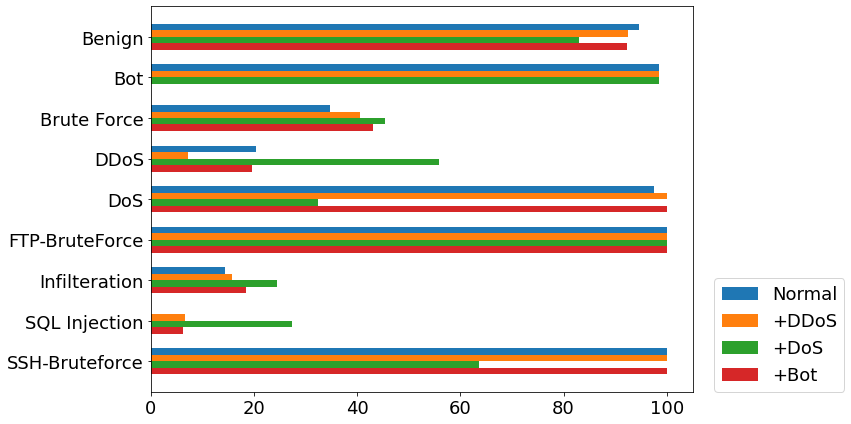

In [442]:
name = 'cic2018_selective_inj'
fig, ax = plt.subplots(figsize=(12, 6))
yax_v = np.arange(len(attack_to_viz))
width = 0.16

ax.barh(yax_v - 3*width/2, list(pred_stat_by_class.values()), width,label='Normal')
ax.barh(yax_v - width/2, list(pred_stat0.values()), width,label='+DDoS')
ax.barh(yax_v + width/2 , list(pred_stat1.values()), width,label='+DoS')
ax.barh(yax_v + 3 * width/2 , list(pred_stat2.values()), width,label='+Bot')


ax.set_yticks(yax_v, labels=attack_to_viz)
ax.invert_yaxis()
# ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title("")
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18, loc=(1.04, 0))
fig.tight_layout()
fig.savefig(f'{name}.pdf')
plt.show()

In [522]:
# Plot F1 evolution for different level of corruption

f1s_kdd = dict(
    ALAD=[[94.7,3.2] ,[94.3,3.0],[85.0, 12.4] ,[82.6,3.2]],
    DAE=[[93.8,0.1], [82.7,8.3] ,[71.4,5.9] ,[69.9,6.2]],
    DAGMM=[[93.8, 3.6 ],[76.3,20.9 ],[59.1, 13.4 ],[40.7,13.9]],
    DSEBM=[[96.7, 0.1 ],[93.7, 0.0] ,[93.1, 0.2] ,[92.5,0.4]],
    DUAD=[[96.6,0.2 ], [93.6, 0.1],[90.9,1.5 ],[88.0, 0.5]],
    NeutraLAD=[[93.7, 0.2], [91.1, 0.7], [87.2, 2.1], [81.7, 2.5]]
)



f1s_nslkdd = dict(
    ALAD=[[89.4, 1.4], [88.2, 2.8], [87.3, 2.0], [83.7, 4.4]],
    DAE=[[94.1, 0.1], [84.1, 1.7], [81.8, 0.5], [81.1, 1.0]],
    DAGMM=[[86.0, 1.8], [84.7, 5.1], [79.5, 8.3], [77.7, 13.6]],
    DSEBM=[[93.4, 0.1], [89.5, 1.7], [80.5, 0.7], [78.5, 0.2]],
    DUAD=[[91.7, 0.1], [91.7, 0.2], [91.6, 0.2], [91.5, 0.4]],
    NeutraLAD=[[94.4, 0.3], [90.5, 1.9], [85.2, 1.6], [82.1, 0.9]]
)


f1s_cic = dict(
    ALAD=[[49.5, 6.6], [39.8, 3.6], [35.7, 6.1], [35.0, 3.7]],
    DAE=[[63.0, 1.5], [53.1, 2.2], [45.3, 2.5], [42.0, 2.2]],
    DAGMM=[[41.7, 10.8], [30.4, 11.0], [25.7, 11.3], [15.9, 9.0]],
    DSEBM=[[32.9, 0.2], [32.5, 0.1], [32.3, 0.1], [31.8, 0.2]],
    DUAD=[[67.5, 2.3], [56.5, 5.4], [51.3, 7.2], [43.7, 4.1]],
    NeutraLAD=[[61.7, 1.4], [49.1, 5.5], [30.0, 14.5], [24.8, 12.8]]
)


In [578]:
def plot_f1(f1s, name = 'f1s'):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    x = [0, 5, 8, 12]
    for k, v in f1s.items():
        ax.plot(x, np.array(v)[:, 0], label=k)
        # ax.errorbar(x, np.array(v)[:, 0], np.array(v)[:, 1], label=k, marker='o')

    # ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.title("")
    plt.ylabel('F1-score', fontsize=18)
    plt.xlabel('contamination ratio(%)', fontsize=18)
    plt.tick_params(labelsize=18)
    plt.legend(fontsize=18, loc=(0.05, -.45), ncol=len(f1s.items())//2)
    fig.tight_layout()
    fig.savefig(f'{name}.pdf')
    plt.show()

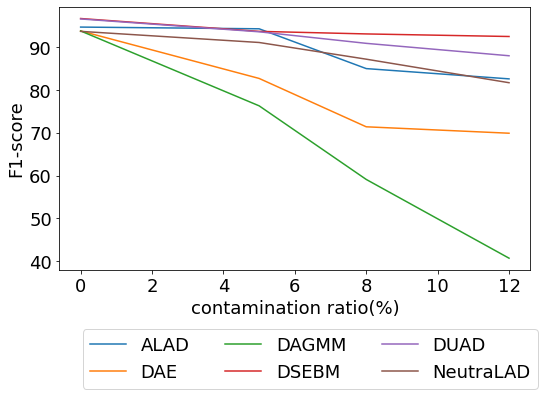

In [579]:
plot_f1(f1s_kdd, name='f1s_kdd')

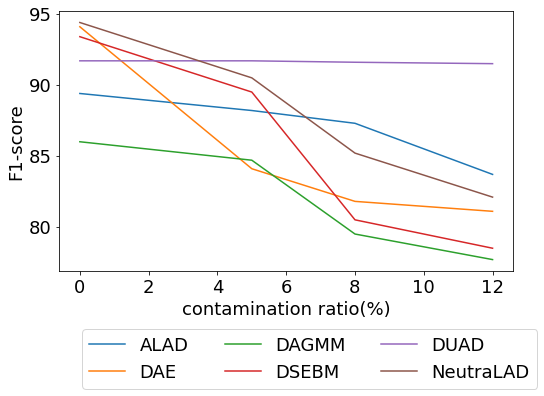

In [580]:
plot_f1(f1s_nslkdd, name='f1s_nslkdd')

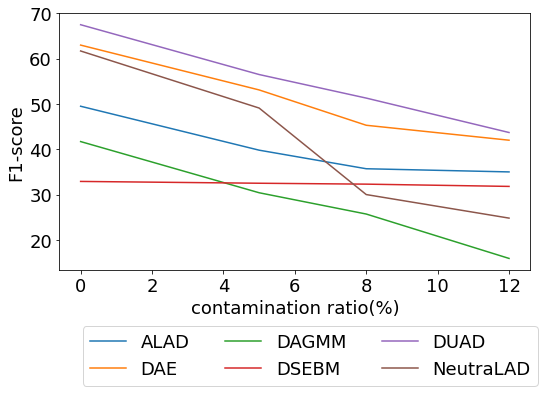

In [581]:
plot_f1(f1s_cic, name='f1s_cic')